In [89]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('./data/GOLD.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [91]:
df['Date'] = pd.to_datetime(df['Date'])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null datetime64[ns]
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        411 non-null float64
new         512 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 36.1+ KB


In [93]:
pd.isnull(df).any()

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
Pred         True
new         False
dtype: bool

In [94]:
df.isna().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [96]:
x = df[['Price','Open','High','Low']]
y = df['Pred']
model = LinearRegression()
model.fit(x[:411],y[:411])
print("Intercept:",model.intercept_)
print('Coefficients: \nClose_Price: {}\nOpen: {}\nHigh: {}\nLow: {}'.format(int(model.coef_[0]),int(model.coef_[1]),int(model.coef_[2]),int(model.coef_[3])))

Intercept: 2.6432189770275727e-11
Coefficients: 
Close_Price: 1
Open: 3
High: -1
Low: -4


In [97]:
df['Pred'][411:] = model.predict(x[411:])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


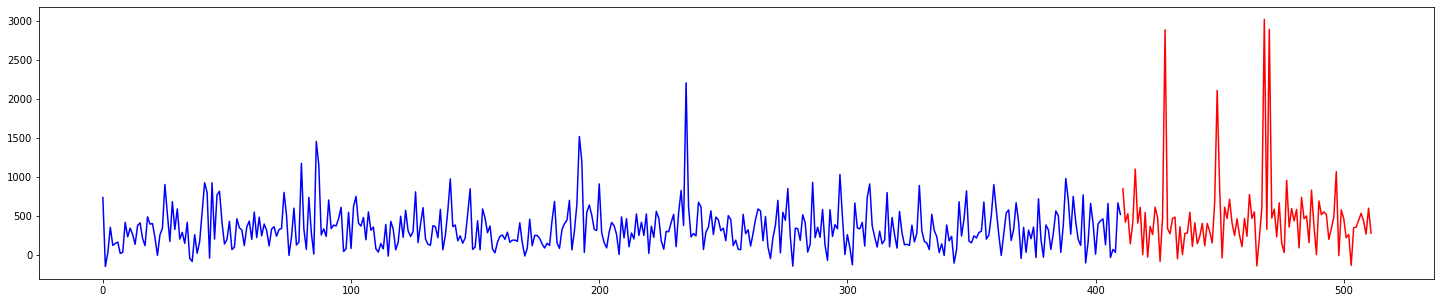

In [98]:
plt.figure(figsize=(25,5))
plt.plot(df['Pred'][:411],color = 'blue')
plt.plot(df['Pred'][411:],color = 'red')


In [99]:
model2 = LinearRegression()
model2.fit(x[:411],df['new'][:411])
print("Intercept:",model2.intercept_)
print('Coefficients: \nClose_Price: {}\nOpen: {}\nHigh: {}\nLow: {}'.format(int(model2.coef_[0]),int(model2.coef_[1]),int(model2.coef_[2]),int(model2.coef_[3])))

Intercept: -0.21616304412336262
Coefficients: 
Close_Price: 1
Open: -1
High: 1
Low: -1


In [100]:
df['newC'] = df['new']
df['newC'][411:] = model2.predict(x[411:])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


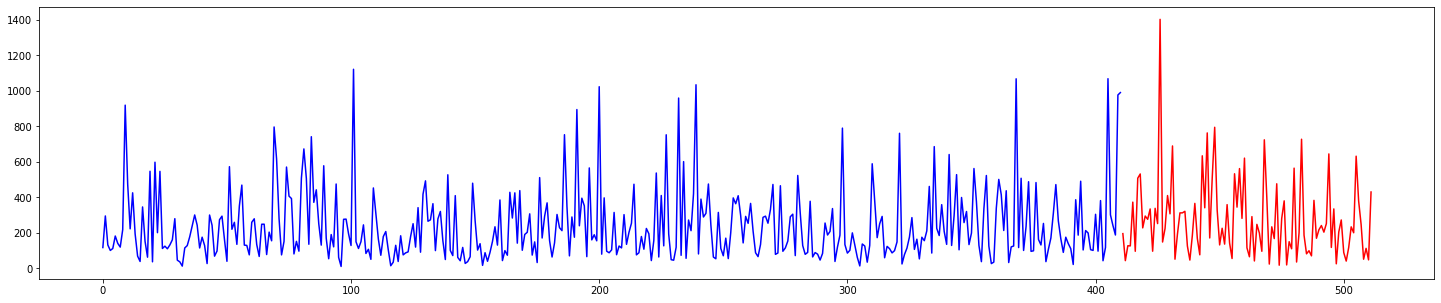

In [101]:
plt.figure(figsize=(25,5))
plt.plot(df['newC'][:411],color = 'blue')
plt.plot(df['newC'][411:],color = 'red')

In [102]:
df_cipla = pd.read_csv('./data/Large_Cap/CIPLA.csv')
df_nifty = pd.read_csv('./data/Nifty50/Nifty50.csv')

In [103]:
df_cipla.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CIPLA,EQ,15-May-2017,567.95,567.00,572.45,561.00,566.65,569.00,568.17,606569,3.446364e+08,20905,349445,57.61
1,CIPLA,EQ,16-May-2017,569.00,566.65,570.00,564.00,565.70,565.60,565.88,330195,1.868504e+08,13421,166079,50.30
2,CIPLA,EQ,17-May-2017,565.60,565.10,566.00,560.05,561.05,562.35,562.01,895238,5.031284e+08,35003,641507,71.66
3,CIPLA,EQ,18-May-2017,562.35,559.30,564.95,556.80,560.90,560.10,560.16,2155599,1.207477e+09,12636,1862981,86.43
4,CIPLA,EQ,19-May-2017,560.10,561.30,566.65,558.65,564.20,564.95,561.86,685662,3.852487e+08,10878,376701,54.94


In [104]:
df_nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [105]:
df_cipla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 15 columns):
Symbol                    496 non-null object
Series                    496 non-null object
Date                      496 non-null object
Prev Close                496 non-null float64
Open Price                496 non-null float64
High Price                496 non-null float64
Low Price                 496 non-null float64
Last Price                496 non-null float64
Close Price               496 non-null float64
Average Price             496 non-null float64
Total Traded Quantity     496 non-null int64
Turnover                  496 non-null float64
No. of Trades             496 non-null int64
Deliverable Qty           496 non-null int64
% Dly Qt to Traded Qty    496 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 58.2+ KB


In [106]:
df_nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 7 columns):
Date                 494 non-null object
Open                 494 non-null float64
High                 494 non-null float64
Low                  494 non-null float64
Close                494 non-null float64
Shares Traded        494 non-null int64
Turnover (Rs. Cr)    494 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.1+ KB


In [107]:
df_final = pd.concat([df_cipla['Date'][:494],df_cipla['Close Price'][:494],df_nifty['Close']],axis=1)

In [108]:
df_final.columns = ['Date','Cipla','Nifty']

In [109]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
Date     494 non-null object
Cipla    494 non-null float64
Nifty    494 non-null float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [110]:
df_final_pct = df_final[['Cipla','Nifty']].pct_change()[1:]

In [111]:
df_final_pct.head()

,Cipla,Nifty
1,-0.005975,0.007078
2,-0.005746,0.001419
3,-0.004001,-0.010109
4,0.008659,-0.000164
5,-0.003275,0.001098


In [112]:
import statsmodels.api as sm 
y = df_final_pct['Cipla'][403:]
x = df_final_pct['Nifty'][403:]
x = sm.add_constant(x)
lm = sm.OLS(y,x).fit()
lm.summary()

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cipla   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.485
Date:                Tue, 23 Jun 2020   Prob (F-statistic):             0.0370
Time:                        22:22:03   Log-Likelihood:                 279.67
No. Observations:                  90   AIC:                            -555.3
Df Residuals:                      88   BIC:                            -550.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.593      0.555      -0.002       0.003
Nifty          0.3578      0.169      2.118      0.037       0.022       0.694
==============================================================================
Omnibus:                       29.764   Durbin-Watson:                   2.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.091
Skew:                           1.133   Prob(JB):                     8.15e-17
Kurtosis:                       6.825   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
df_last_3_month = lm.predict(x)

In [114]:
df_final['Month'] = pd.DatetimeIndex(df_final['Date']).month

In [115]:
month_group = df_final.groupby('Month')

In [116]:
month_group.first()

,Date,Cipla,Nifty
Month,,,
1,01-Jan-2018,611.50,10435.55
2,01-Feb-2018,587.05,11016.90
3,01-Mar-2018,581.70,10458.35
4,02-Apr-2018,576.25,10211.80
5,15-May-2017,569.00,9445.40
6,01-Jun-2017,515.55,9616.10
7,03-Jul-2017,551.85,9615.00
8,01-Aug-2017,562.45,10114.65
9,01-Sep-2017,568.40,9974.40


In [117]:
for i,j in month_group:
    j_pct = j[['Cipla','Nifty']].pct_change()[1:]
    x = j_pct['Nifty']
    y = j_pct['Cipla']
    x = sm.add_constant(x)
    lm1 = sm.OLS(y,x).fit()
    print("For Month No {}, Beta value : {}".format(i,lm1.params[1]))

For Month No 1, Beta value : 1.612049590977481
For Month No 2, Beta value : -0.7132434466414059
For Month No 3, Beta value : 0.17865836795167883
For Month No 4, Beta value : -1.3376171367542422
For Month No 5, Beta value : 1.363401040215536
For Month No 6, Beta value : -0.4253098271211855
For Month No 7, Beta value : 1.7348963737921956
For Month No 8, Beta value : 0.8292637317292308
For Month No 9, Beta value : 0.6049482453852333
For Month No 10, Beta value : 0.8004779992614119
For Month No 11, Beta value : 1.08636042435208
For Month No 12, Beta value : -0.5117448051388783
